In [1]:
import numpy as np

In [2]:
class Operation():
    
    def __init__(self, input_nodes=[]):
        self.input_nodes = input_nodes
        self.output_nodes = []
    
        for node in input_nodes:
            node.output_nodes.append(self)
            
        _default_graph.operations.append(self)
    
    def compute(self):
        pass

In [3]:
class add(Operation):
    
    def __init__(self, x, y):
        super().__init__([x, y])
    
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]
        return x_var + y_var

In [4]:
class multiply(Operation):
    
    def __init__(self, x, y):
        super().__init__([x, y])
    
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]
        return x_var * y_var

In [5]:
class matmul(Operation):
    
    def __init__(self, x, y):
        super().__init__([x, y])
    
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]
        return x_var.dot(y_var)

In [6]:
class Placeholder():
    
    def __init__(self):
        self.output_nodes = []
        
        _default_graph.placeholders.append(self)

In [7]:
class Variable():
    
    def __init__(self, initial_value=None):
        self.value = initial_value
        self.output_nodes = []
        
        _default_graph.variables.append(self)

In [8]:
class Graph():
    
    def __init__(self):
        self.operations = []
        self.placeholders = []
        self.variables = []
        
    def set_as_default(self):
        global _default_graph
        _default_graph = self

z = Ax + b

- A = 10
- b = 1

z = 10x + 1

In [9]:
g = Graph()

In [10]:
g.set_as_default()

In [11]:
A = Variable(10)

In [12]:
b = Variable(1)

In [13]:
x = Placeholder()

In [14]:
y = multiply(A, x)

In [15]:
z = add(y, b)

In [16]:
def traverse_postorder(operation):
    nodes_postorder = []
    
    def recurse(node):
        if(isinstance(node, Operation)):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)
    
    recurse(operation)
    return nodes_postorder

In [17]:
class Session():
    
    def run(self, operation, feed_dict={}):
        node_postorder = traverse_postorder(operation)
        
        for node in node_postorder:
            
            if type(node) == Placeholder:
                node.output = feed_dict[node]
            
            elif type(node) == Variable:
                node.output = node.value
                
            else:
                node.inputs = [input_node.output for input_node in node.input_nodes]
                node.output = node.compute(*node.inputs)
            
            if type(node.output) == list:
                node.output = np.array(node.output)
        
        return operation.output

In [18]:
sess = Session()

In [19]:
result = sess.run(operation=z, feed_dict={x: 10})

In [20]:
result

101

In [21]:
g = Graph()

g.set_as_default()

A = Variable([[10, 20], [30, 40]])

b = Variable([1, 1])

x = Placeholder()

y = matmul(A, x)

z = add(y, b)

In [22]:
sess = Session()

In [23]:
sess.run(operation=z, feed_dict={x: 10})

array([[101, 201],
       [301, 401]])

# Classification

## Activation Function

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [26]:
sample_z = np.linspace(-10, 10, 100)
sample_a = sigmoid(sample_z)

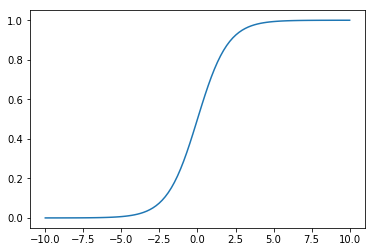

In [27]:
plt.plot(sample_z, sample_a)

In [66]:
class Sigmoid(Operation):
    
    def __init__(self, z):
        super().__init__([z])
        
    def compute(self, z_var):
        return 1 / (1 + np.exp(-z_var))

In [67]:
from sklearn.datasets import make_blobs

In [68]:
data = make_blobs(n_samples=50, n_features=2, centers=2, random_state=75)

In [69]:
features = data[0]
lables = data[1]

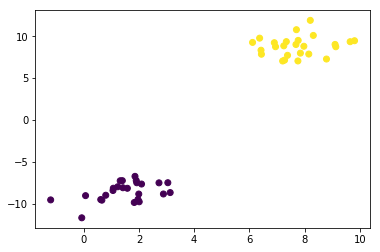

In [70]:
plt.scatter(features[:,0], features[:,1], c=lables)

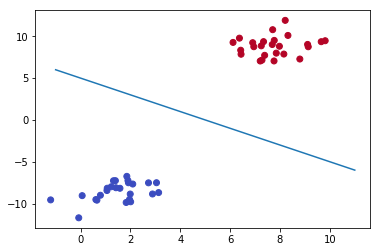

In [71]:
x = np.linspace(-1, 11, 10)
y = -x + 5

plt.scatter(features[:,0], features[:,1], c=lables, cmap="coolwarm")
plt.plot(x, y)

(1, 1) * f - 5 = 0

In [72]:
np.array([1,1]).dot(np.array([[8], [10]])) - 5

array([13])

In [73]:
np.array([1,1]).dot(np.array([[0], [4]])) - 5

array([-1])

In [74]:
g = Graph()

In [75]:
g.set_as_default()

In [76]:
x = Placeholder()

In [77]:
w = Variable([1, 1])

In [78]:
b = Variable(-5)

In [79]:
z = add(matmul(w, x), b)

In [80]:
a = Sigmoid(z)

In [81]:
sess = Session()

In [93]:
sess.run(operation=a, feed_dict={x: [2, -10]})

2.2603242979035746e-06